## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.concatenate([np.load(f"/home/xiantao/case/wall_pressure/bigchannel/data/to_meet/channel_180_u_y{i}_all_out.npy") for i in [5, 10, 20, 40, 60, 70, 80, 100, 120, 150]], axis=1)

In [2]:
data_y = np.load('u_xy_jax.npy')

In [ ]:
# data_y_ = np.load('u_xy_jax.npy')

In [94]:
data_y_multi_channel = np.load('u_xy_multi_channel.npy')

In [3]:
def corr(u1, u2, x, dx):
    def cov(u1, u2, axes):
        return np.mean(u1*u2,axis=axes)
    u1, u2 = u1[..., *x], u2[..., *(x + dx)]
    num = cov(u1, u2, axes=(0,1))
    den = np.sqrt(cov(u1, u1, axes=(0,1))*cov(u2, u2, axes=(0,1)))
    return num/den  

In [4]:
chan_x, chan_y, chan_z = 320, 400, 200

## $C_{xx}(y^+)$

In [365]:
x = np.array([0,chan_z//2])
dxs = np.zeros((chan_x//2,2),dtype=int)
dxs[:, 0] = np.arange(0,chan_x//2)

In [366]:
corrs_yx = []
for i in range(10):
    corrs= []
    for dx in dxs:
        corrs.append(corr(data[:, i:i+1], data[:, i:i+1], x, dx))
    corrs_yx.append(corrs)

In [367]:
ys = [5, 10, 20, 40, 60, 70, 80, 100, 120, 150]

In [368]:
data[:, 1:2].mean(axis=(0,2,3))

array([-7.552405e-08], dtype=float32)

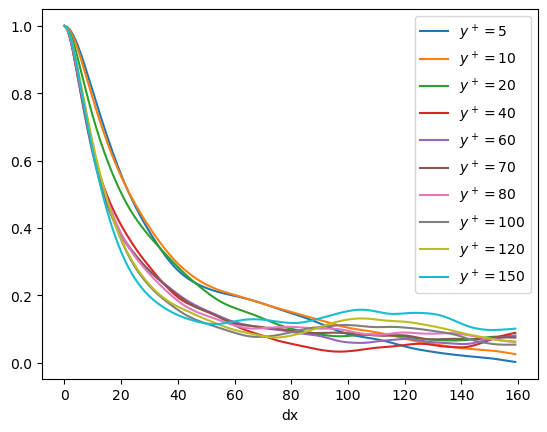

In [369]:
for i, corr_ in enumerate(corrs_yx):
    plt.plot(corr_, label=rf"$y^+={ys[i]}$")
plt.xlabel('dx')
plt.legend()
plt.show()

## $C_{zz}(y^+)$

In [370]:
z = np.array([chan_x//2,0])
dzs = np.zeros((chan_z//2,2),dtype=int)
dzs[:, 1] = np.arange(0,chan_z//2)

In [371]:
corrs_yz = []
for i in range(10):
    corrs= []
    for dz in dzs:
        z_dz = z + dz
        corrs.append(corr(data[:, i:i+1], data[:, i:i+1], z, dz))
    corrs_yz.append(corrs)

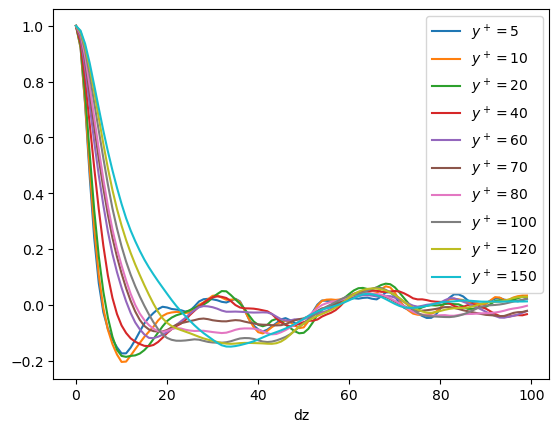

In [372]:
for i, corr_ in enumerate(corrs_yz):
    plt.plot(corr_, label=rf"$y^+={ys[i]}$")
plt.xlabel('dz')
plt.legend()
plt.show()

## $C_{yy}(y^+)$

In [5]:
yps = np.array([0, 5, 40, 60, 80, 100, 120, 140, 160, 180])*200/180 #0, 5, 10, 20, 40, 60, 70, 100, 120, 150
corrs_yy = []
for yp in yps:
    yp = int(yp)
    y = np.array([yp, chan_z//2])
    dys = np.zeros((chan_y//2 -yp,2),dtype=int)
    dys[:, 0] = np.arange(0,chan_y//2 - yp)
    corrs= []
    for dy in dys:
        corrs.append(corr(data_y[:, 0:1], data_y[:, 0:1], y, dy))
    corrs_yy.append(corrs)

In [6]:
ind=1

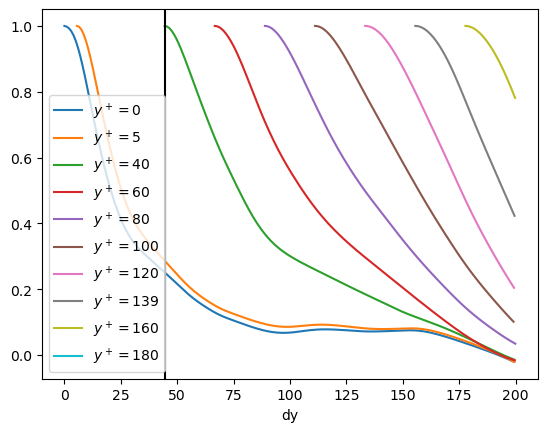

In [11]:
for i, corr_ in  zip(range(len(yps)), corrs_yy):#zip([ind], corrs_yy[ind:ind+1]):# ind=5#
    plt.plot(np.arange(yps[i], chan_y//2), corr_, label=rf"$y^+ = {int(yps[i]*180/200)}$")
# for yp in [0.58, 0.31]:
#     plt.axhline(y = yp, color = 'red')
for yp in yps[2:3]:
    plt.axvline(x = yp, color = 'black')
plt.xlabel('dy')
# plt.xscale('log')
plt.legend()
plt.show()

## Effect of cross-section

In [304]:
data_y_multi_channel.shape

(17900, 5, 400, 200)

In [332]:
yps = [60]
corrs_yy_2 = []
for yp in yps:
    y = np.array([yp, chan_z//2])
    dys = np.zeros((chan_y//2 -yp,2),dtype=int)
    dys[:, 0] = np.arange(0,chan_y//2 - yp)
    corrs_cs = []
    for i in range(data_y_multi_channel.shape[1]):
        corrs= []
        for dy in dys:
            corrs.append(corr(data_y_multi_channel[:, i:i+1], data_y_multi_channel[:, i:i+1], y, dy))
        corrs_cs.append(corrs)
    corrs_yy_2.append(corrs_cs)

In [333]:
np.array(corrs_yy_2)[0].shape

(5, 140)

In [334]:
cs = [25, 50 ,100, 160, 200]

In [335]:
np.array(corrs_yy_2)[0].shape

(5, 140)

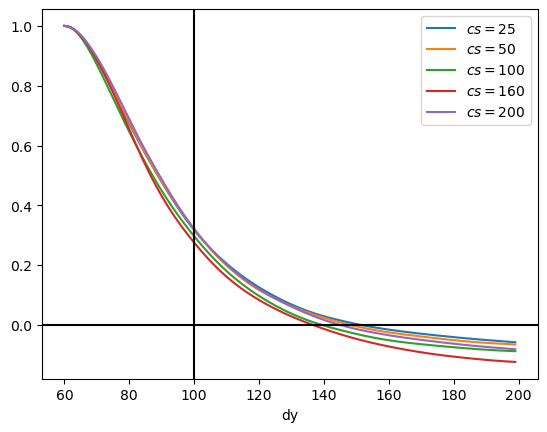

In [336]:
i = 0
for corr_ in np.array(corrs_yy_2)[0]:
    plt.plot(np.arange(yps[0], chan_y//2), corr_, label=rf"$cs={cs[i]}$")
    i += 1
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 100, color = 'black')
plt.xlabel('dy')
plt.legend()
plt.show()

## RMS calculation

In [224]:
data_y.shape, data_y_multi_channel.shape

((17900, 1, 400, 200), (17900, 5, 400, 200))

In [225]:
u_rms = data_y.std(axis=(0,1,-1))
# u_rms_ = data_y_.std(axis=(0,1,-1))

In [227]:
u_rms_ensemble = (data_y_multi_channel.std(axis=(0,1,-1)))

In [220]:
u_ref = np.loadtxt('/home/xiantao/storage/data/APGdata-180/APGchannel-0-long/postprocess/u_fluct_180.txt')

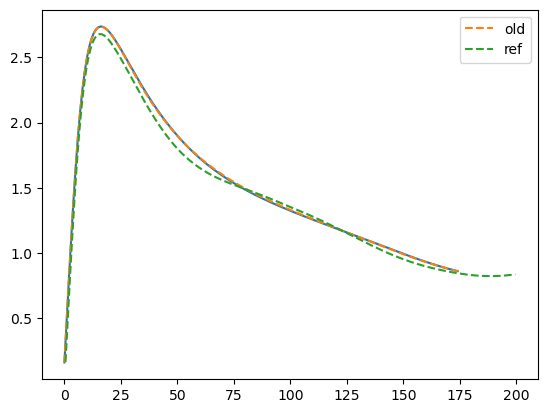

In [230]:
plt.plot(u_rms[:175]/0.045)
# plt.plot(u_rms_[:175]/0.045, '--', label='jax')
plt.plot(u_rms_ensemble[:175]/0.045, '--', label='old')
plt.plot((200/180)*u_ref[:,0], u_ref[:,1], '--',label='ref')
plt.legend()